In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

### Récupérer les données dans train et test

Chaque ligne contient les séries pour les 3 capteurs puis la classe:

    longueur | 512 mesures pour capteur 1 | 512 mesures pour capteur 2 | 512 mesures pour capteur 3 | 512 mesures pour capteur 4 | Chiffre vu |

In [1]:
from tools.data import get_datasets

train, test = get_datasets()
print train.shape
print test.shape

Reading data file
(30000, 2050)
(10983, 2050)


## Afficher les 300 premières courbes

/home/python/anaconda/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


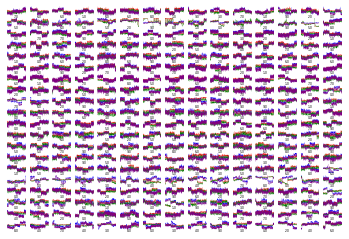

In [7]:
rows = 20
cols = 15

for i in range(rows * cols):
    
    code = train[i,-1]
    
    axe = plt.subplot(rows, cols, i)
    plt.setp(axe, 'frame_on', False)
    axe.set_xticks([])
    axe.set_yticks([])
    axe.xaxis.set_label_coords(0.5, 0.2)
    axe.set_xlabel(str(code), size=3)
    axe.plot(train[i,1:1+train[i,0]], linewidth=0.1, c='b')
    axe.plot(train[i,1+512*1:1+512*1+train[i,0]], linewidth=0.1, c='r')
    axe.plot(train[i,1+512*2:1+512*2+train[i,0]], linewidth=0.1, c='g')
    axe.plot(train[i,1+512*3:1+512*3+train[i,0]], linewidth=0.1, c='purple')
    # axe.set_title(str(code))

plt.savefig('test.pdf', format='pdf')

plt.show()

    

## Afficher uniquement les -1

/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


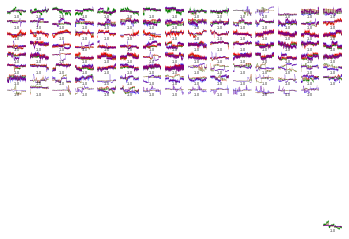

In [18]:
rows = 20
cols = 15

display_only = -1
selected = np.compress(train[:,-1] == display_only, train, axis=0)

for i in range(min(rows * cols, selected.shape[0])):
    
    code = selected[i,-1]
    
    axe = plt.subplot(rows, cols, i)
    plt.setp(axe, 'frame_on', False)
    axe.set_xticks([])
    axe.set_yticks([])
    axe.xaxis.set_label_coords(0.5, 0.2)
    axe.set_xlabel(str(code), size=3)
    axe.plot(selected[i,1:1+selected[i,0]], linewidth=0.1, c='b')
    axe.plot(selected[i,1+512*1:1+512*1+selected[i,0]], linewidth=0.1, c='r')
    axe.plot(selected[i,1+512*2:1+512*2+selected[i,0]], linewidth=0.1, c='g')
    axe.plot(selected[i,1+512*3:1+512*3+selected[i,0]], linewidth=0.1, c='purple')
    # axe.set_title(str(code))

plt.savefig('test-%d.pdf' % display_only, format='pdf')

plt.show()

## Afficher un histogramme des longueurs des séries

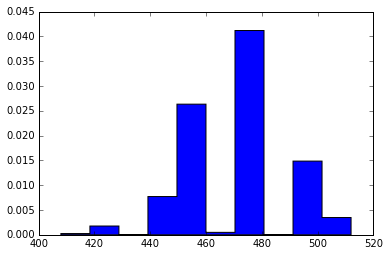

In [5]:
n, bins, patches = plt.hist(train[:,0], 10, normed=1, histtype='stepfilled')
plt.show()


In [6]:
(train[:,0] == 0).sum()

0